#專案說明

##探討2020年至2021年期間
台灣地區的旅館租屋價格、平均住房率、餐飲與旅館業失業率、Covid-19確診以及國際機場旅客數的相關性
經過另一個專案裡Tableau的圖示 發現底下的欄位

[餐飲與住宿的失業率] 與 [月確診數]
[旅館住用率]與 [月確診數]

可能有相關性的關聯
希望透過Python的輔助來檢視其相關性的高低

##資料來源
和Tableau採用相同的資料集
彙整自底下連結：

交通部統計查詢網：https://stat.motc.gov.tw/mocdb/stmain.jsp?sys=100
勞動部統計查詢網：https://statdb.mol.gov.tw/statis/jspProxy.aspx?sys=210&kind=21&type=1&funid=q020751&rdm=R97692
政府資料開放平台：https://data.gov.tw/dataset/151770

整理後的excel請參考:Portfolio_Project_Covid19與旅遊業資訊的相關性分析.csv

In [1]:
#載入需要的模組以及csv檔案
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

df = pd.read_csv('Portfolio_Project_Covid19與旅遊業資訊的相關性分析.csv')
df


,yyyy_mm,avg_price,avg_rent,isic_ur,month_cases,airport_passengers
0,202001,3741,46.59%,5.10%,8,5021755
1,202002,3188,31.50%,3.71%,17,2396741
2,202003,2885,19.22%,3.93%,27,637606
3,202004,3012,16.22%,7.29%,3,42547
4,202005,2802,24.17%,7.78%,0,48224
5,202006,3049,42.03%,6.67%,0,59175
6,202007,3367,55.36%,5.91%,0,96791
7,202008,3614,58.93%,4.85%,0,115553
8,202009,3092,53.47%,4.37%,0,106873
9,202010,3385,56.98%,6.53%,0,101924


#欄位說明
yyyy_mm:確診年月
avg_price:旅館平均價格
avg_rent:旅館平均住用率
isic_ur:餐飲與住宿的失業率
month_cases:每月確診數
airport_passengers:台灣地區四大國際機場(台北/桃園/台中/高雄)的旅客數

In [2]:
#透過info()得知資料概況
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   yyyy_mm             24 non-null     int64 
 1   avg_price           24 non-null     int64 
 2   avg_rent            24 non-null     object
 3   isic_ur             24 non-null     object
 4   month_cases         24 non-null     int64 
 5   airport_passengers  24 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.2+ KB


In [3]:
#利用isna()搭配sum()檢查有沒有Null
df.isna().sum()

yyyy_mm               0
avg_price             0
avg_rent              0
isic_ur               0
month_cases           0
airport_passengers    0
dtype: int64

In [4]:
#describe()搭配轉置矩陣快速得知資料概況
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yyyy_mm,24.0,202056.500000,5.119698e+01,202001.0,202006.75,202056.5,202106.25,202112.0
avg_price,24.0,3380.833333,3.229956e+02,2802.0,3170.75,3376.0,3620.75,4226.0
month_cases,24.0,608.708333,2.001808e+03,0.0,0.00,5.5,26.25,8789.0
airport_passengers,24.0,410622.208333,1.093148e+06,42547.0,77275.75,92017.5,106567.75,5021755.0


In [5]:
#稍後會用皮爾森相關係數檢驗個欄位之間的相關性
#需要將avg_rent與isic_ur這兩個欄位轉為數字
#故先將其利用string的型態移掉 % 符號 再將其轉成數字

df['avg_rent'] = df['avg_rent'].astype('str').str[:-1]
df['isic_ur'] = df['isic_ur'].astype('str').str[:-1]

df['avg_rent'] = df['avg_rent'].astype('float')
df['isic_ur'] = df['isic_ur'].astype('float')

In [6]:
#檢查每個欄位是否都為數字型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yyyy_mm             24 non-null     int64  
 1   avg_price           24 non-null     int64  
 2   avg_rent            24 non-null     float64
 3   isic_ur             24 non-null     float64
 4   month_cases         24 non-null     int64  
 5   airport_passengers  24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.2 KB


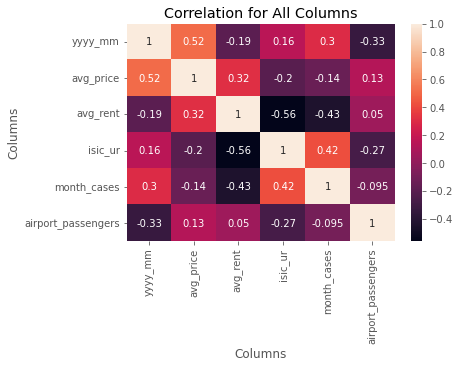

In [7]:
#開始檢驗各個欄位的皮爾森相關係數
corr_matrix= df.corr(method = 'pearson')

sns.heatmap(corr_matrix,annot = True)

plt.title('Correlation for All Columns')
plt.xlabel('Columns')
plt.ylabel('Columns')

matplotlib.rcParams['figure.figsize'] = (50,15) #調整之後會出現的圖形

plt.show()


##意外的發現

從相關性檢驗來看
發現[餐飲與住宿的失業率] 和[旅館住用率] 也有負相關性

在此一起檢驗
[餐飲與住宿的失業率] 與 [月確診數]
[餐飲與住宿的失業率] 與 [旅館住用率]
[旅館住用率]與 [月確診數]


##[餐飲與住宿的失業率] 與 [月確診數]的相關性

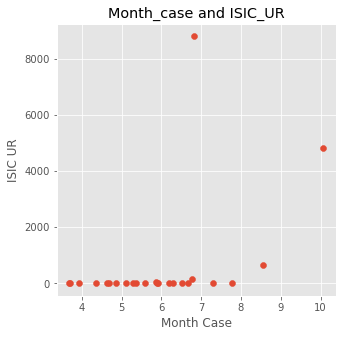

In [14]:
#month_case和isic_ur之間有0.42的相關性 兩者提出來檢查散佈圖

plt.scatter(x=df['isic_ur'], y=df['month_cases'])
plt.title('Month_case and ISIC_UR')

plt.xlabel('Month Case')
plt.ylabel('ISIC UR')
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.show()

<AxesSubplot:xlabel='isic_ur', ylabel='month_cases'>

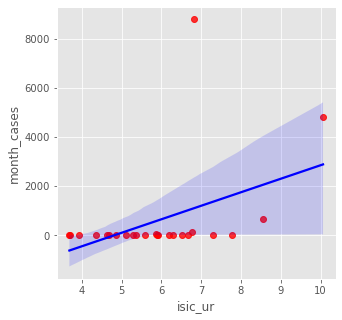

In [9]:
#另外搭配輔助線來將相關性視覺化
#得知已皮爾森相關係數來檢驗其實相關性其實並不明顯
sns.regplot(x='isic_ur', y='month_cases' ,data = df, scatter_kws = {"color":"red"}, line_kws={"color":"blue"})

##[餐飲與住宿的失業率] 與 [旅館住用率]

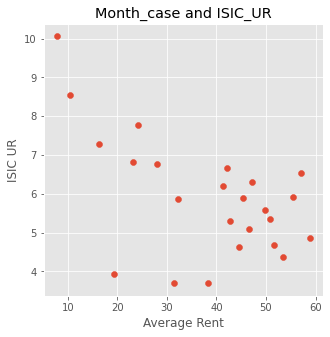

In [10]:
#另一方面檢驗avg_rent與isic_ur兩者之間的皮爾森相關係數-0.56的視覺化
plt.scatter(x=df['avg_rent'], y=df['isic_ur'])
plt.title('Month_case and ISIC_UR')

plt.xlabel('Average Rent')
plt.ylabel('ISIC UR')
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.show()

<AxesSubplot:xlabel='avg_rent', ylabel='isic_ur'>

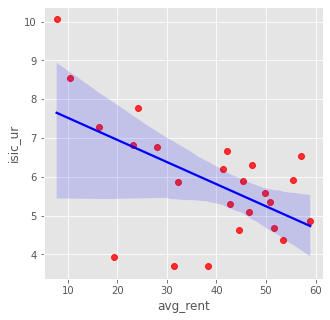

In [11]:
#同樣搭配輔助線來檢驗相關性 這次可以看到avg_rent與isic_ur之間附相關收斂的程度比較明顯
sns.regplot(x='avg_rent', y='isic_ur' ,data = df, scatter_kws = {"color":"red"}, line_kws={"color":"blue"})

##[旅館住用率]與 [月確診數] 的相關性

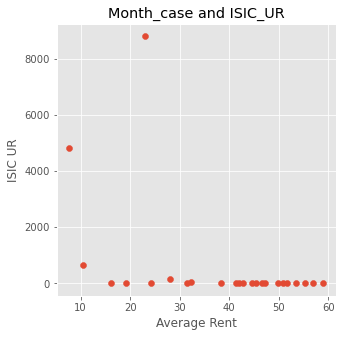

In [12]:
#另一方面檢驗avg_rent與month_cases兩者之間的皮爾森相關係數-0.43的視覺化
plt.scatter(x=df['avg_rent'], y=df['month_cases'])
plt.title('Month_case and ISIC_UR')

plt.xlabel('Average Rent')
plt.ylabel('ISIC UR')
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.show()

<AxesSubplot:xlabel='avg_rent', ylabel='month_cases'>

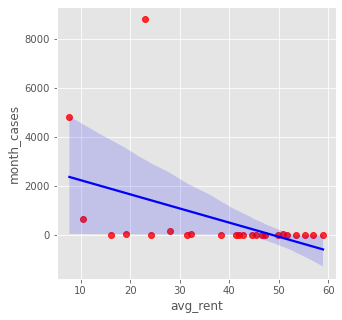

In [13]:
#另外兩個組合avg_rent與month_cases
#輔助線來檢驗相關性 也可以看到負相關收斂的程度

sns.regplot(x='avg_rent', y='month_cases' ,data = df, scatter_kws = {"color":"red"}, line_kws={"color":"blue"})